In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
%matplotlib inline 

In [13]:
#def some helpers
# read data
import scipy.io as sio
mat_1 = sio.loadmat('dataset.mat', squeeze_me=True)
X_train=mat_1["X_train"]
X_test=mat_1["X_test"]
Y_train=mat_1["Y_train"]
Y_test=mat_1["Y_test"]
print("s1=2 , s2= 2 or 10,  s3 =1")

s1=2 , s2= 2 or 10,  s3 =1


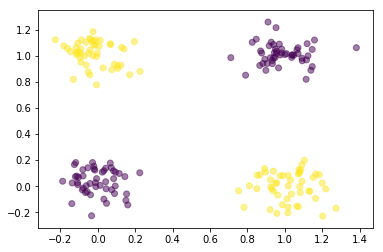

In [14]:
x1 = X_train[0,:]
x2 = X_train[1,:]
colors = Y_train
plt.scatter(x1, x2, c=colors, alpha=0.5)

both training and test are not linearly seprable


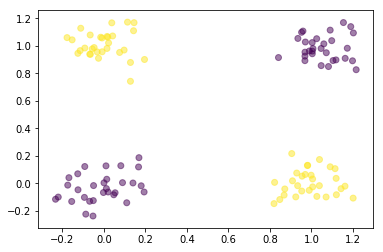

In [15]:
x1 = X_test[0,:]
x2 = X_test[1,:]
colors = Y_test
plt.scatter(x1, x2, c=colors, alpha=0.5)
print("both training and test are not linearly seprable")

In [36]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s
def relu(x):
    s = np.maximum(0,x)
    return s
def tanh(x):
    return np.tanh(x)

In [17]:
def layer_sizes(X, Y, s2=2):
    """
    Arguments:
    X -- input dataset of shape (feature size, number of examples)
    Y -- labels of shape (output size(1 in our problem), number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """

    n_x = X.shape[0] # size of input layer (features)
    n_h = s2          # set as 2 or 10 as required in the problem
    n_y = Y.shape[0] # size of output layer

    return (n_x, n_h, n_y)

In [18]:
def init_parameters(n_x, n_h, n_y):
    """
    load NN size for s1, s2 , s3
    
    init weights for GD regarding the size... 
    # recall dim(w[n]) = dim(dw[n]= (s[n+1],s[n])
    #        dim(b[n]) = (s[n+1],m)
        W1 -- weight matrix of shape (n_h, n_x)
        b1 -- bias vector of shape (n_h, 1)  # for one sampel
        W2 -- weight matrix of shape (n_y, n_h)
        b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(666) #init seed
    

    W1 = np.random.randn(n_h, n_x)*0.01  #set small incase it blow up; we dont bother scalling/batch norm/ optimize of gradient
    b1 = np.zeros((n_h, 1))  # this doesn't really matter 
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))

    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [19]:
def compute_cost(A2, Y, parameters,lamda):
    """
    use cross entropy for cost f; compute it for update in GD
    

    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2  
    output cost
    """
    
    m = Y.shape[1] #m
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    logprobs = np.multiply(np.log(A2),Y) + np.multiply((1-Y), (np.log(1-A2)))
    cost = -1/m * np.sum(logprobs)
    
    cross_entropy_cost = np.squeeze(cost)  # ensure no [[]] npform, just.. should look at np document if have time axiba
    L2_regularization_cost = lamda * (np.sum(np.square(W1)) + np.sum(np.square(W2))) / (2 * m)
    
    cost = cross_entropy_cost - L2_regularization_cost
    
    return cost

In [20]:
###################
#################### DIFFERENT ACTIVATION

In [52]:
def forward_propagation(X, parameters):
    """

    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (load this from init; then update it each iter)
    
    Returns:
    A2 -- output
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"; for back prop update later..
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    ####  here recall z[n]=w[n]*A[n-1]+b[n]
    ####              A[n]=f(z[n])
    Z1 = np.dot(W1, X) + b1 
    A1 = np.tanh(Z1)  ### modify this later for relu;sigomid.神经病一样
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)  #same
    #print(Z1.shape)
    #print(A1.shape)
    #print(Z2.shape)
    #print(A2.shape)
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache
def backward_propagation(parameters, cache, X, Y,lamda):   #sigmoid for out and tanh for hidden
    """
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing gradients with each iter and params
    """
    m = X.shape[1]
    # load params
    W1 = parameters['W1']
    W2 = parameters['W2']       
    #load A1,A2
    A1 = cache['A1']
    A2 = cache['A2']
    # back prop
    dZ2= A2 - Y
    dW2 =1/m * np.dot(dZ2, A1.T) + (lamda * W2) / m
    db2 =1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    #print(A1.shape)
    #print((1-A1).shape)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2)) #this is for tanh
    #dZ1 = np.dot(np.dot(W2.T, dZ2) , (np.dot(A1.T, (1-A1))))
    
    dW1 = 1/m * np.dot(dZ1, X.T) +(lamda * W1) / m
    db1 =1/m * np.sum(dZ1, axis=1, keepdims=True)

    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [374]:
def backward_propagation(parameters, cache, X, Y,lamda):  # this use tanh
    """
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing gradients with each iter and params
    """
    m = X.shape[1]
    # load params
    W1 = parameters['W1']
    W2 = parameters['W2']       
    #load A1,A2
    A1 = cache['A1']
    A2 = cache['A2']
    # back prop
    dZ2= (-np.divide(Y,A2) + np.divide((1-Y),(1-A2)))* (1 - np.power(A2, 2))
    
   # print(dZ2.shape)
    #print(A2.shape)
    dW2 =1/m * np.dot(dZ2, A1.T)
    db2 =1/m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 =1/m * np.sum(dZ1, axis=1, keepdims=True)

    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [ ]:
#####################
######################

In [21]:
# GD
def update_parameters(parameters, grads, learning_rate = 1.2):
    """

    parameters -- python dictionary containing params 
    grads -- python dictionary containing grads
    
    Returns:
    parameters -- updated weights
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]


    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [22]:
def nn_model(X, Y, n_h, lamda,num_iterations = 30000, print_cost=False):
    """
    X:(2,m)
    Y:(1,m)
    n_h -- s2
    num_iterations ...
    print_cost ...
    
    output:
    parameters optimal weitghs
    """
    
    np.random.seed(666)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    

    n_x, n_h, n_y = layer_sizes(X, Y)
    parameters = init_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    
    ##GD

    for i in range(0, num_iterations):
        #forward prop; load Z,A,COST
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters,lamda)
 
        # Back prop; update prams
        grads = backward_propagation(parameters, cache, X, Y,lamda)
 
        # update prams
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters,cache

In [25]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()

In [65]:
def predict(parameters, X):

    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2+0.0001)

    
    return predictions

# s=2 # USE tanh

----------- for lamda is : 0.01 ----------
validation acc is : 1.0
test acc is : 1.0
----------- for lamda is : 0.1 ----------
validation acc is : 1.0
test acc is : 1.0
----------- for lamda is : 1 ----------
validation acc is : 1.0
test acc is : 1.0
----------- for lamda is : 10 ----------
validation acc is : 0.0
test acc is : 0.5
----------- for lamda is : 20 ----------
validation acc is : 0.0
test acc is : 0.5
----------- for lamda is : 100 ----------
validation acc is : 0.0
test acc is : 0.5
W1 = [[-3.00505055  3.08968729]
 [-3.23632155  3.21199309]]
b1 = [[ 1.58873899]
 [-1.6812129 ]]
W2 = [[-6.01072029  5.99695857]]
b2 = [[5.90051811]]
A2 = [[0.00649475 0.01189056 0.0058049  0.00537957 0.00780641 0.00559749
  0.00644425 0.0091528  0.00936741 0.00946714 0.00735963 0.00595785
  0.00541817 0.00780817 0.00535096 0.01763686 0.00529807 0.00681581
  0.01064998 0.0062331  0.01035523 0.02368458 0.00932645 0.02156278
  0.0054896  0.00534715 0.00760162 0.00737052 0.00541578 0.00534889
  0.0

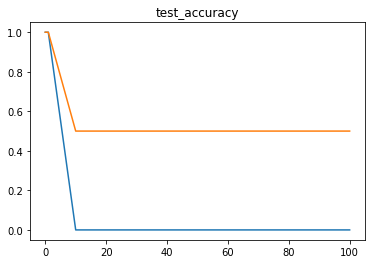

In [27]:




reg=[]
error=[]

error_test=[]
for lam in [0.01,0.1,1,10,20,100]:
    print("----------- for lamda is :",lam,"----------")
    parameters, cache = nn_model(X_train[:,:180], Y_train[:180].reshape(1,180), 10,lamda=lam, num_iterations=10000, print_cost=False)
    pred_y= predict(parameters, X_train[:,181:])[0]
    acc=sum(pred_y==Y_train[181:])/len(Y_train[181:])
    
    print("validation acc is :",acc)
    reg.append(lam)
    error.append(acc)
    
    pred_y_test = predict(parameters, X_test)[0]
    acc_t=sum(pred_y_test==Y_test)/len(Y_test)
    error_test.append(acc_t)
    print("test acc is :",acc_t)
    
plt.title('train_accuracy')
plt.plot(reg,error)
plt.title('test_accuracy')
plt.plot(reg,error_test)

parameters, cache = nn_model(X_train, Y_train.reshape(1,200), 2,lamda=0.1, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

print("A2 = " + str(cache["A2"]))


----------- for lamda is : 100 ----------


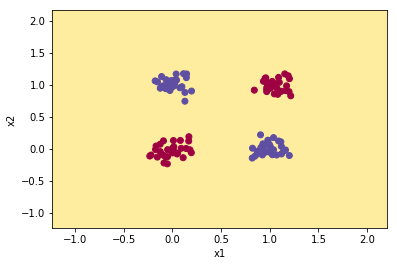

----------- for lamda is : 1 ----------


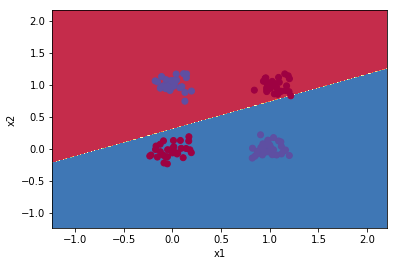

----------- for lamda is : 0.01 ----------


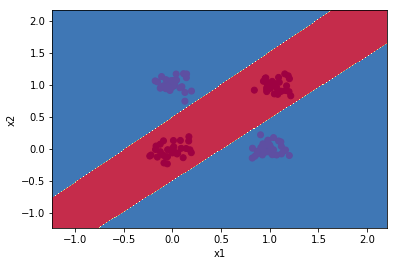

----------- for lamda is : 0.001 ----------


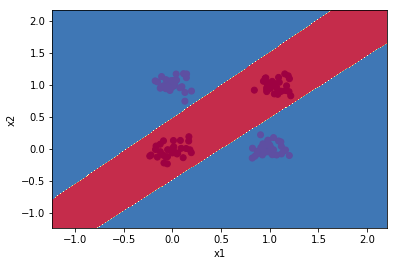

In [29]:
for lam in [100,1,0.01,0.001]:
    print("----------- for lamda is :",lam,"----------")
    parameters, cache = nn_model(X_train, Y_train.reshape(1,200), 2,lamda=lam, num_iterations=20000, print_cost=False)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X_test, Y_test)
    

----------- for lamda is : 0.01 ----------
validation acc is : 1.0
test acc is : 1.0
----------- for lamda is : 0.1 ----------
validation acc is : 1.0
test acc is : 1.0
----------- for lamda is : 1 ----------
validation acc is : 1.0
test acc is : 1.0
----------- for lamda is : 10 ----------
validation acc is : 0.0
test acc is : 0.5
----------- for lamda is : 20 ----------
validation acc is : 0.0
test acc is : 0.5
----------- for lamda is : 100 ----------
validation acc is : 0.0
test acc is : 0.5
W1 = [[-3.00505055  3.08968729]
 [-3.23632155  3.21199309]]
b1 = [[ 1.58873899]
 [-1.6812129 ]]
W2 = [[-6.01072029  5.99695857]]
b2 = [[5.90051811]]
A2 = [[0.00649475 0.01189056 0.0058049  0.00537957 0.00780641 0.00559749
  0.00644425 0.0091528  0.00936741 0.00946714 0.00735963 0.00595785
  0.00541817 0.00780817 0.00535096 0.01763686 0.00529807 0.00681581
  0.01064998 0.0062331  0.01035523 0.02368458 0.00932645 0.02156278
  0.0054896  0.00534715 0.00760162 0.00737052 0.00541578 0.00534889
  0.0

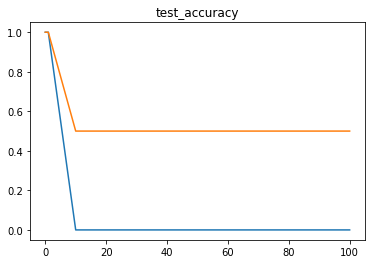

In [30]:
#for s =10






reg=[]
error=[]

error_test=[]
for lam in [0.01,0.1,1,10,20,100]:
    print("----------- for lamda is :",lam,"----------")
    parameters, cache = nn_model(X_train[:,:180], Y_train[:180].reshape(1,180), 10,lamda=lam, num_iterations=10000, print_cost=False)
    pred_y= predict(parameters, X_train[:,181:])[0]
    acc=sum(pred_y==Y_train[181:])/len(Y_train[181:])
    
    print("validation acc is :",acc)
    reg.append(lam)
    error.append(acc)
    
    pred_y_test = predict(parameters, X_test)[0]
    acc_t=sum(pred_y_test==Y_test)/len(Y_test)
    error_test.append(acc_t)
    print("test acc is :",acc_t)
    
plt.title('train_accuracy')
plt.plot(reg,error)
plt.title('test_accuracy')
plt.plot(reg,error_test)

parameters, cache = nn_model(X_train, Y_train.reshape(1,200), 10,lamda=0.1, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

print("A2 = " + str(cache["A2"]))

----------- for lamda is : 100 ----------


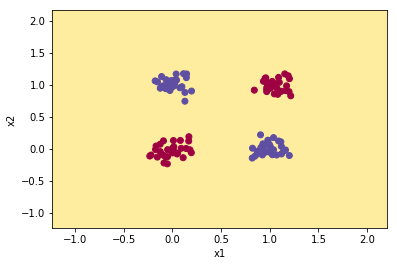

----------- for lamda is : 1 ----------


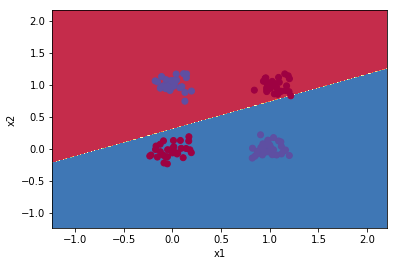

----------- for lamda is : 1 ----------


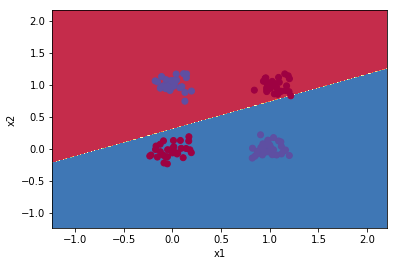

----------- for lamda is : 0.01 ----------


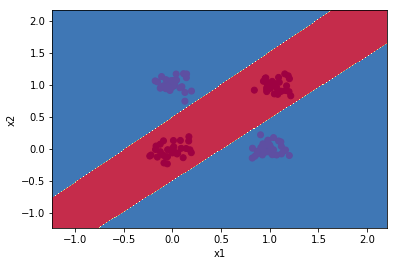

----------- for lamda is : 0.001 ----------


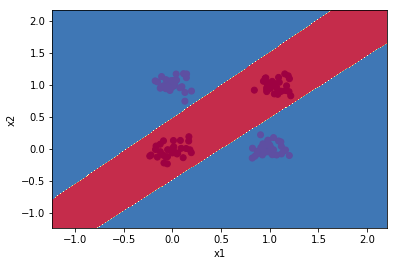

In [31]:
for lam in [100,1,1,0.01,0.001]:
    print("----------- for lamda is :",lam,"----------")
    parameters, cache = nn_model(X_train, Y_train.reshape(1,200), 2,lamda=lam, num_iterations=20000, print_cost=False)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X_test, Y_test)
    

# s=2 # and s=10 use Relu Activation

In [44]:
def backward_propagation(parameters, cache, X, Y,lamda):   #sigmoid
    """
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing gradients with each iter and params
    """
    m = X.shape[1]
    # load params
    W1 = parameters['W1']
    W2 = parameters['W2']       
    #load A1,A2
    A1 = cache['A1']
    A2 = cache['A2']
    # back prop
    dZ2= A2 - Y
    dW2 =1/m * np.dot(dZ2, A1.T) + (lamda * W2) / m
    db2 =1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    #print(A1.shape)
    #print((1-A1).shape)
    #dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2)) this is for tanh
    dZ1 = np.dot(np.dot(W2.T, dZ2) , (np.dot(A1.T, (1-A1))))
    
    dW1 = 1/m * np.dot(dZ1, X.T) +(lamda * W1) / m
    db1 =1/m * np.sum(dZ1, axis=1, keepdims=True)

    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

----------- for lamda is : 100 ----------
validation acc is : 0.0
test acc is : 0.5
----------- for lamda is : 1 ----------
validation acc is : 0.0
test acc is : 0.5
----------- for lamda is : 1 ----------
validation acc is : 0.0
test acc is : 0.5
----------- for lamda is : 0.01 ----------
validation acc is : 0.0
test acc is : 0.5
----------- for lamda is : 0.001 ----------
validation acc is : 0.0
test acc is : 0.5
W1 = [[0.0017206  0.00183826]
 [0.00175906 0.00188195]]
b1 = [[0.98734496]
 [1.00491825]]
W2 = [[-0.05580211 -0.05702937]]
b2 = [[0.11267375]]
A2 = [[0.50007166 0.50006256 0.50006589 0.50007279 0.50006557 0.50005604
  0.50006476 0.50006845 0.50006221 0.50007161 0.50007064 0.5000577
  0.50008083 0.50007242 0.50006774 0.50006533 0.50005674 0.50005058
  0.50008052 0.50006235 0.50005888 0.5000633  0.50006908 0.50006445
  0.50007237 0.5000567  0.50006677 0.5000611  0.50006622 0.50005626
  0.50006852 0.50005443 0.50006315 0.50006018 0.50005604 0.50007159
  0.50005918 0.50006794 0.

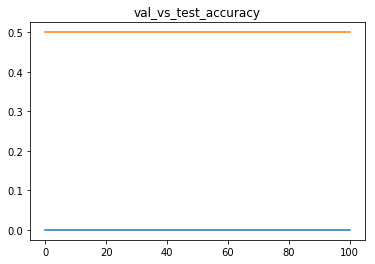

In [48]:

#for s =2
reg=[]
error=[]

error_test=[]
for lam in [100,1,0.01,0.001]:
    print("----------- for lamda is :",lam,"----------")
    parameters, cache = nn_model(X_train[:,:180], Y_train[:180].reshape(1,180), 10,lamda=lam, num_iterations=10000, print_cost=False)
    #plot_decision_boundary(lambda x: predict(parameters, x.T), X_test, Y_test)
    pred_y= predict(parameters, X_train[:,181:])[0]
    acc=sum(pred_y==Y_train[181:])/len(Y_train[181:])
    
    print("validation acc is :",acc)
    reg.append(lam)
    error.append(acc)
    
    pred_y_test = predict(parameters, X_test)[0]
    acc_t=sum(pred_y_test==Y_test)/len(Y_test)
    error_test.append(acc_t)
    print("test acc is :",acc_t)

plt.title('train_accuracy')
plt.plot(reg,error)
plt.title('val_vs_test_accuracy')
plt.plot(reg,error_test)


parameters, cache = nn_model(X_train, Y_train.reshape(1,200), 2,lamda=0.1, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("A2 = " + str(cache["A2"]))



----------- for lamda is : 1 ----------


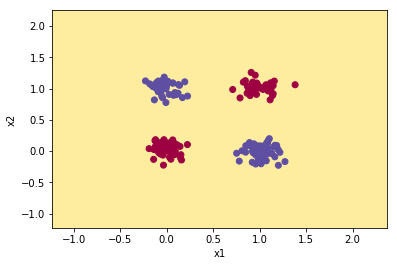

----------- for lamda is : 0.1 ----------


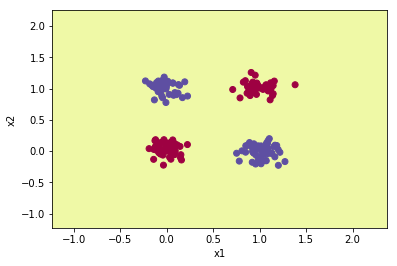

----------- for lamda is : 0.01 ----------


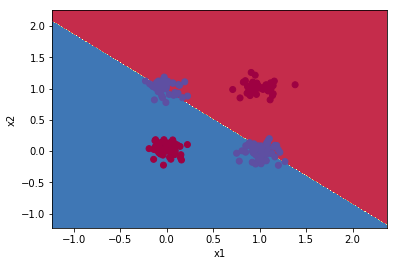

In [47]:
for lam in [1,0.1,0.01]:
    print("----------- for lamda is :",lam,"----------")
    parameters, cache = nn_model(X_train, Y_train.reshape(1,200), 2,lamda=lam, num_iterations=30000, print_cost=False)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X_train, Y_train)
    

W1 = [[0.0017206  0.00183826]
 [0.00175906 0.00188195]]
b1 = [[0.98734496]
 [1.00491825]]
W2 = [[-0.05580211 -0.05702937]]
b2 = [[0.11267375]]
A2 = [[0.50007166 0.50006256 0.50006589 0.50007279 0.50006557 0.50005604
  0.50006476 0.50006845 0.50006221 0.50007161 0.50007064 0.5000577
  0.50008083 0.50007242 0.50006774 0.50006533 0.50005674 0.50005058
  0.50008052 0.50006235 0.50005888 0.5000633  0.50006908 0.50006445
  0.50007237 0.5000567  0.50006677 0.5000611  0.50006622 0.50005626
  0.50006852 0.50005443 0.50006315 0.50006018 0.50005604 0.50007159
  0.50005918 0.50006794 0.50006668 0.5000613  0.50006986 0.50005983
  0.50007206 0.50006429 0.50006608 0.5000643  0.50007423 0.50007095
  0.50006    0.50007254 0.49997193 0.49997198 0.4999629  0.49996668
  0.49996519 0.49996392 0.4999686  0.49996418 0.49997629 0.4999626
  0.49996878 0.4999594  0.4999649  0.49995875 0.49996443 0.49996987
  0.49996222 0.49996357 0.49997004 0.49995135 0.49996285 0.4999658
  0.49998358 0.49996551 0.49997593 0.49

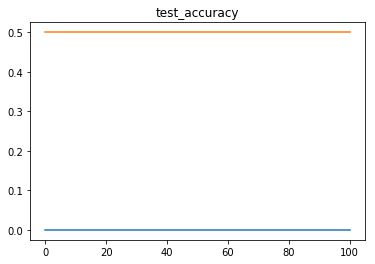

In [49]:
#for s =10

parameters, cache = nn_model(X_train, Y_train.reshape(1,200), 10,lamda=0.1, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

print("A2 = " + str(cache["A2"]))




reg=[]
error=[]

error_test=[]
for lam in [0.01,0.1,1,10,20,100]:
    print("----------- for lamda is :",lam,"----------")
    parameters, cache = nn_model(X_train[:,:180], Y_train[:180].reshape(1,180), 10,lamda=lam, num_iterations=10000, print_cost=False)
    pred_y= predict(parameters, X_train[:,181:])[0]
    acc=sum(pred_y==Y_train[181:])/len(Y_train[181:])
    
    print("validation acc is :",acc)
    reg.append(lam)
    error.append(acc)
    
    pred_y_test = predict(parameters, X_test)[0]
    acc_t=sum(pred_y_test==Y_test)/len(Y_test)
    error_test.append(acc_t)
    print("test acc is :",acc_t)
    
plt.title('train_accuracy')
plt.plot(reg,error)
plt.title('test_accuracy')
plt.plot(reg,error_test)

----------- for lamda is : 1 ----------


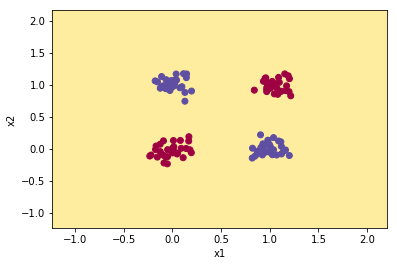

----------- for lamda is : 0.1 ----------


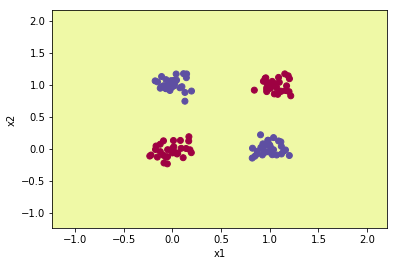

----------- for lamda is : 0.01 ----------


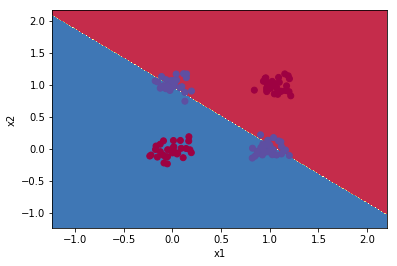

In [51]:
for lam in [1,0.1,0.01]:
    print("----------- for lamda is :",lam,"----------")
    parameters, cache = nn_model(X_train, Y_train.reshape(1,200), 10,lamda=lam, num_iterations=30000, print_cost=False)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X_test, Y_test)
    

# USE sigmoid

----------- for lamda is : 0.01 ----------
validation acc is : 1.0
test acc is : 0.75
----------- for lamda is : 0.1 ----------
validation acc is : 1.0
test acc is : 0.75
----------- for lamda is : 1 ----------
validation acc is : 1.0
test acc is : 0.75
----------- for lamda is : 10 ----------
validation acc is : 1.0
test acc is : 0.7333333333333333
W1 = [[-3.00505055  3.08968729]
 [-3.23632155  3.21199309]]
b1 = [[ 1.58873899]
 [-1.6812129 ]]
W2 = [[-6.01072029  5.99695857]]
b2 = [[5.90051811]]
A2 = [[0.00649475 0.01189056 0.0058049  0.00537957 0.00780641 0.00559749
  0.00644425 0.0091528  0.00936741 0.00946714 0.00735963 0.00595785
  0.00541817 0.00780817 0.00535096 0.01763686 0.00529807 0.00681581
  0.01064998 0.0062331  0.01035523 0.02368458 0.00932645 0.02156278
  0.0054896  0.00534715 0.00760162 0.00737052 0.00541578 0.00534889
  0.00819773 0.00622281 0.0053526  0.00578876 0.00583778 0.00561148
  0.00581352 0.0055825  0.0284712  0.00696999 0.00562467 0.00542018
  0.0053724  0.005

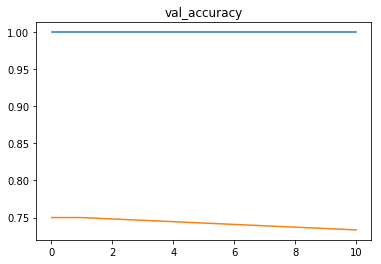

In [74]:


reg=[]
error=[]

error_test=[]
for lam in [0.01,0.1,1,10]:
    print("----------- for lamda is :",lam,"----------")
    parameters, cache = nn_model(X_train[:,:150], Y_train[:150].reshape(1,150), 2,lamda=lam, num_iterations=10000, print_cost=False)
    pred_y= predict(parameters, X_train[:,151:])[0]
    acc=1-(sum(pred_y==Y_train[151:])/len(Y_train[151:]))
    
    print("validation acc is :",acc)
    reg.append(lam)
    error.append(acc)
    
    pred_y_test = predict(parameters, X_test)[0]
    acc_t=sum(pred_y_test==Y_test)/len(Y_test)
    error_test.append(acc_t)
    print("test acc is :",acc_t)
    
plt.title('train_accuracy')
plt.plot(reg,error)
plt.title('val_accuracy')
plt.plot(reg,error_test)


parameters, cache = nn_model(X_train, Y_train.reshape(1,200), 2,lamda=0.1, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

print("A2 = " + str(cache["A2"]))




----------- for lamda is : 0.01 ----------


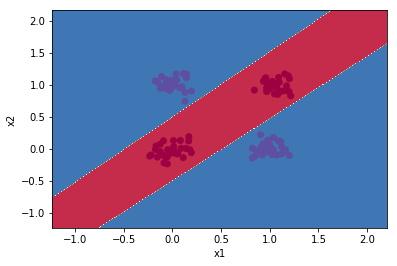

----------- for lamda is : 0.1 ----------


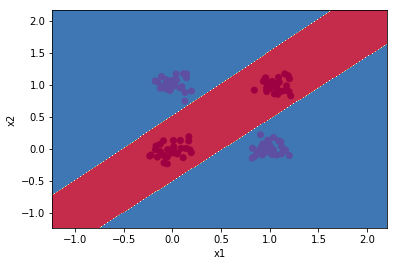

----------- for lamda is : 1 ----------


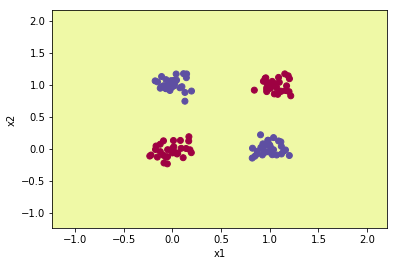

----------- for lamda is : 10 ----------


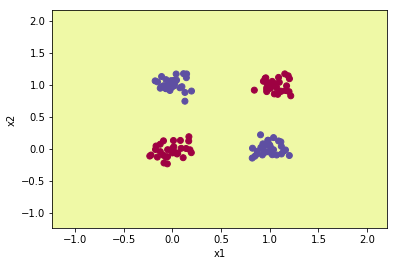

In [77]:
for lam in [0.01,0.1,1,10]:
    print("----------- for lamda is :",lam,"----------")
    parameters, cache = nn_model(X_train, Y_train.reshape(1,200), 2,lamda=lam, num_iterations=20000, print_cost=False)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X_test, Y_test)
    

----------- for lamda is : 0.01 ----------
validation acc is : 1.0
test acc is : 1.0
----------- for lamda is : 0.1 ----------
validation acc is : 1.0
test acc is : 1.0
----------- for lamda is : 1 ----------
validation acc is : 1.0
test acc is : 1.0
----------- for lamda is : 10 ----------
validation acc is : 0.0
test acc is : 0.5
----------- for lamda is : 20 ----------
validation acc is : 0.0
test acc is : 0.5
----------- for lamda is : 100 ----------
validation acc is : 0.0
test acc is : 0.5


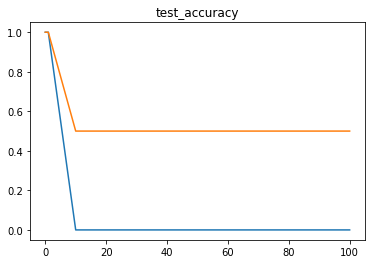

In [80]:
#for s =10
'''
parameters, cache = nn_model(X_train, Y_train.reshape(1,200), 10,lamda=0.1, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

print("A2 = " + str(cache["A2"]))
'''


reg=[]
error=[]

error_test=[]
for lam in [0.01,0.1,1,10,20,100]:
    print("----------- for lamda is :",lam,"----------")
    parameters, cache = nn_model(X_train[:,:180], Y_train[:180].reshape(1,180), 10,lamda=lam, num_iterations=10000, print_cost=False)
    pred_y= predict(parameters, X_train[:,181:])[0]
    acc=sum(pred_y==Y_train[181:])/len(Y_train[181:])
    
    print("validation acc is :",acc)
    reg.append(lam)
    error.append(acc)
    
    pred_y_test = predict(parameters, X_test)[0]
    acc_t=sum(pred_y_test==Y_test)/len(Y_test)
    error_test.append(acc_t)
    print("test acc is :",acc_t)
    
plt.title('train_accuracy')
plt.plot(reg,error)
plt.title('test_accuracy')
plt.plot(reg,error_test)






----------- for lamda is : 0.01 ----------


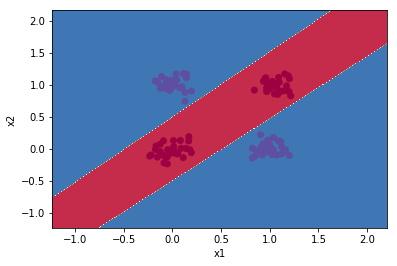

----------- for lamda is : 0.1 ----------


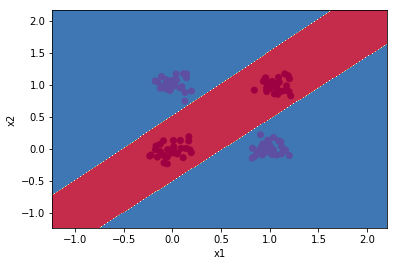

----------- for lamda is : 1 ----------


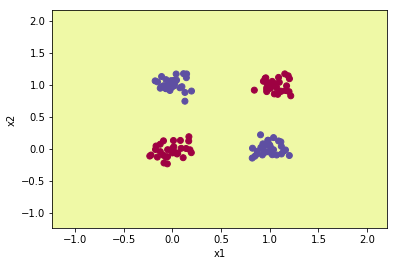

----------- for lamda is : 10 ----------


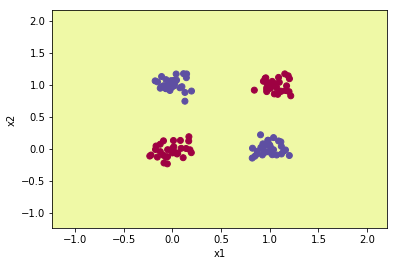

----------- for lamda is : 20 ----------


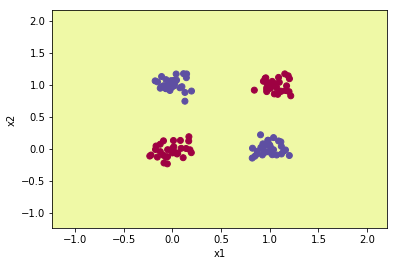

----------- for lamda is : 100 ----------


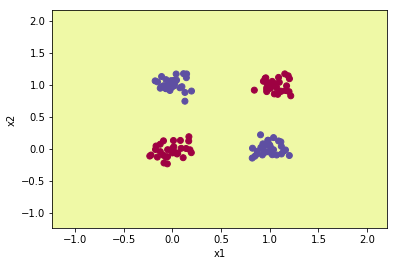

In [81]:
for lam in [0.01,0.1,1,10,20,100]:
    print("----------- for lamda is :",lam,"----------")
    parameters, cache = nn_model(X_train, Y_train.reshape(1,200), 10,lamda=lam, num_iterations=20000, print_cost=False)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X_test, Y_test)